## Importing Libraries and Importing Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("C:\\Users\\Vrinda\\Downloads\\House Price Prediction\\House Price Prediction\\Dataset.csv")

## Describing Dataset

In [2]:
data.head()

,No,Property_Type,Land_Area,Floor_Area,Condition,View,Amenities,Furnishing_Status,Air_Conditioning (Yes/No),Heating (Yes/No),...,Location,Num_bathrooms,Num_rooms,Price,distance to nearest MRT Station,distance to nearest Hospital,distance to nearest School,distance to nearest Bus Stand,distance to nearest Airport,Crimerate in area
0,1,Condo,1784,1555,New,NaN,Basic,Fully Furnished,No,Yes,...,Phoenix,3,2,334126,7.06,11.83,3.54,2.67,45.83,9.9
1,2,Farmhouse,1768,1530,New,City View,Basic,Semi Furnished,No,Yes,...,San Francisco,2,3,1895788,3.96,14.28,1.02,1.21,21.99,7.7
2,3,Apartment,2667,2667,Old,Park Facing,Rooftop Access,Fully Furnished,Yes,No,...,Miami,2,3,4397494,14.08,0.92,4.94,0.62,11.06,5.3
3,4,Apartment,1262,1262,Old,City View,NaN,Semi Furnished,Yes,No,...,Chicago,3,4,1367842,14.17,14.21,7.13,0.39,43.88,8.9
4,5,Apartment,1720,1720,Renovated,City View,Parking,Semi Furnished,Yes,No,...,New York,4,6,1403758,6.09,8.50,7.16,4.56,40.70,8.2


In [3]:
data.shape

(500000, 25)

In [4]:
print(data.info)

<bound method DataFrame.info of             No Property_Type  Land_Area  Floor_Area  Condition         View  \
0            1         Condo       1784        1555        New          NaN   
1            2     Farmhouse       1768        1530        New    City View   
2            3     Apartment       2667        2667        Old  Park Facing   
3            4     Apartment       1262        1262        Old    City View   
4            5     Apartment       1720        1720  Renovated    City View   
...        ...           ...        ...         ...        ...          ...   
499995  499996         Condo       3815        2060  Renovated    City View   
499996  499997         Villa       6514        4525        Old    City View   
499997  499998     Apartment       2587        2587        Old    City View   
499998  499999     Apartment       2897        2897        Old          NaN   
499999  500000         Condo       3898        1986  Renovated          NaN   

                 Am

In [5]:
data.describe()

,No,Land_Area,Floor_Area,Maintenance_Fees,Latitude,Longitude,Num_bathrooms,Num_rooms,Price,distance to nearest MRT Station,distance to nearest Hospital,distance to nearest School,distance to nearest Bus Stand,distance to nearest Airport,Crimerate in area
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,250000.500000,4124.896648,2326.954952,303.431346,37.311516,-98.872206,2.994360,4.305154,2.945870e+06,7.752000,10.251818,5.250775,2.549711,27.509618,7.199771
std,144337.711635,3349.107572,1534.688648,202.728801,6.213226,18.899258,1.698684,2.123215,2.778550e+06,4.187235,5.634280,2.743490,1.414027,12.992188,2.307742
min,1.000000,800.000000,0.000000,0.000000,25.261717,-122.919382,0.000000,0.000000,2.400000e+05,0.500000,0.500000,0.500000,0.100000,5.000000,1.200000
25%,125000.750000,1946.000000,1235.000000,169.000000,33.452485,-118.245102,2.000000,3.000000,1.035060e+06,4.130000,5.380000,2.870000,1.320000,16.260000,6.000000
50%,250000.500000,3033.000000,2103.000000,270.000000,38.269711,-104.499100,3.000000,4.000000,1.965798e+06,7.750000,10.240000,5.250000,2.550000,27.500000,8.000000
75%,375000.250000,4993.000000,2961.000000,416.000000,41.867570,-80.201614,4.000000,6.000000,3.951216e+06,11.380000,15.130000,7.630000,3.780000,38.760000,9.000000
max,500000.000000,20000.000000,9490.000000,1000.000000,48.106200,-70.559041,7.000000,10.000000,1.999754e+07,15.000000,20.000000,10.000000,5.000000,50.000000,10.000000


In [6]:
data.dtypes

No                                   int64
Property_Type                       object
Land_Area                            int64
Floor_Area                           int64
Condition                           object
View                                object
Amenities                           object
Furnishing_Status                   object
Air_Conditioning (Yes/No)           object
Heating (Yes/No)                    object
Kitchen_Type                        object
Balcony (Yes/No)                    object
Maintenance_Fees                     int64
Latitude                           float64
Longitude                          float64
Location                            object
Num_bathrooms                        int64
Num_rooms                            int64
Price                                int64
distance to nearest MRT Station    float64
distance to nearest Hospital       float64
distance to nearest School         float64
distance to nearest Bus Stand      float64
distance to

## Data Cleaning and Preprocessing

In [7]:
data['Amenities'] = data['Amenities'].fillna('').astype(str).str.strip()

# Creating set of unique amenities
unique_amenities = set()
for amenities in data['Amenities']:
    unique_amenities.update([a.strip() for a in amenities.split(',')])

# Creating binary columns for each unique amenity
for amenity in unique_amenities:
    data[amenity] = data['Amenities'].apply(lambda x: 1 if amenity in [a.strip() for a in x.split(',')] else 0)

# Dropping "Amenities" column as it is no longer needed
data.drop('Amenities', axis=1, inplace=True)

# Verify the cleaning
data.head()


,No,Property_Type,Land_Area,Floor_Area,Condition,View,Furnishing_Status,Air_Conditioning (Yes/No),Heating (Yes/No),Kitchen_Type,...,distance to nearest Airport,Crimerate in area,,Swimming Pool,Parking,Basic,Shared Gym,Gym,Rooftop Access,Garden
0,1,Condo,1784,1555,New,NaN,Fully Furnished,No,Yes,Semi Modular,...,45.83,9.9,0,0,0,1,0,0,0,0
1,2,Farmhouse,1768,1530,New,City View,Semi Furnished,No,Yes,Normal,...,21.99,7.7,0,0,0,1,0,0,0,0
2,3,Apartment,2667,2667,Old,Park Facing,Fully Furnished,Yes,No,Normal,...,11.06,5.3,0,0,0,0,0,0,1,0
3,4,Apartment,1262,1262,Old,City View,Semi Furnished,Yes,No,Modular,...,43.88,8.9,1,0,0,0,0,0,0,0
4,5,Apartment,1720,1720,Renovated,City View,Semi Furnished,Yes,No,Semi Modular,...,40.70,8.2,0,0,1,0,0,0,0,0


In [8]:
# Null Handling of Numeircal Columns
# Drop rows where values are NaN or blank
data = data.dropna(how='all')

# Drop duplicate rows
data = data.drop_duplicates()

# Handle missing values
data = data.fillna(data.median(numeric_only=True))

# Display the cleaned data
data.head


<bound method NDFrame.head of             No Property_Type  Land_Area  Floor_Area  Condition         View  \
0            1         Condo       1784        1555        New          NaN   
1            2     Farmhouse       1768        1530        New    City View   
2            3     Apartment       2667        2667        Old  Park Facing   
3            4     Apartment       1262        1262        Old    City View   
4            5     Apartment       1720        1720  Renovated    City View   
...        ...           ...        ...         ...        ...          ...   
499995  499996         Condo       3815        2060  Renovated    City View   
499996  499997         Villa       6514        4525        Old    City View   
499997  499998     Apartment       2587        2587        Old    City View   
499998  499999     Apartment       2897        2897        Old          NaN   
499999  500000         Condo       3898        1986  Renovated          NaN   

       Furnishing_Sta

In [9]:
# Null Handling of Categorical Columns
columns_to_check = ['Property_Type', 'Condition', 'View', 'Furnishing_Status',
       'Air_Conditioning (Yes/No)', 'Heating (Yes/No)', 'Kitchen_Type',
       'Balcony (Yes/No)', 'Location']

# Drop rows with NaN values
data = data.dropna(subset=columns_to_check)

In [10]:
## Outliar Handling and Detecting
import numpy as np
# Outlier detection and treatment using IQR
numeric_cols = ['Land_Area', 'Floor_Area', 'Maintenance_Fees', 'Num_bathrooms',
                'Num_rooms', 'Price', 'distance to nearest MRT Station',
                'distance to nearest Hospital', 'distance to nearest School',
                'distance to nearest Bus Stand', 'distance to nearest Airport',
                'Crimerate in area']

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])


C:\Users\Vrinda\AppData\Local\Temp\ipykernel_16536\2488780904.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
C:\Users\Vrinda\AppData\Local\Temp\ipykernel_16536\2488780904.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
C:\Users\Vrinda\AppData\Local\Temp\ipykernel_16536\2488780904.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [11]:
data.dtypes

No                                   int64
Property_Type                       object
Land_Area                          float64
Floor_Area                         float64
Condition                           object
View                                object
Furnishing_Status                   object
Air_Conditioning (Yes/No)           object
Heating (Yes/No)                    object
Kitchen_Type                        object
Balcony (Yes/No)                    object
Maintenance_Fees                   float64
Latitude                           float64
Longitude                          float64
Location                            object
Num_bathrooms                      float64
Num_rooms                          float64
Price                              float64
distance to nearest MRT Station    float64
distance to nearest Hospital       float64
distance to nearest School         float64
distance to nearest Bus Stand      float64
distance to nearest Airport        float64
Crimerate i

In [12]:
# Identify all columns with data type 'object'
object_columns = data.select_dtypes(include=['object']).columns

# Display the list of object columns
print("Object columns in the DataFrame:")
print(object_columns)

for col in object_columns:
    print(f"\nData in column '{col}':")
    print(data[col].head())

Object columns in the DataFrame:
Index(['Property_Type', 'Condition', 'View', 'Furnishing_Status',
       'Air_Conditioning (Yes/No)', 'Heating (Yes/No)', 'Kitchen_Type',
       'Balcony (Yes/No)', 'Location'],
      dtype='object')

Data in column 'Property_Type':
1    Farmhouse
2    Apartment
3    Apartment
4    Apartment
5        Condo
Name: Property_Type, dtype: object

Data in column 'Condition':
1          New
2          Old
3          Old
4    Renovated
5          Old
Name: Condition, dtype: object

Data in column 'View':
1      City View
2    Park Facing
3      City View
4      City View
5     Sea Facing
Name: View, dtype: object

Data in column 'Furnishing_Status':
1     Semi Furnished
2    Fully Furnished
3     Semi Furnished
4     Semi Furnished
5    Fully Furnished
Name: Furnishing_Status, dtype: object

Data in column 'Air_Conditioning (Yes/No)':
1     No
2    Yes
3    Yes
4    Yes
5    Yes
Name: Air_Conditioning (Yes/No), dtype: object

Data in column 'Heating (Yes/No)':


In [13]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = [
    'Property_Type', 'Condition', 'Furnishing_Status', 'Air_Conditioning (Yes/No)', 'Heating (Yes/No)', 'Kitchen_Type', 'Balcony (Yes/No)','Location', 'View'
]


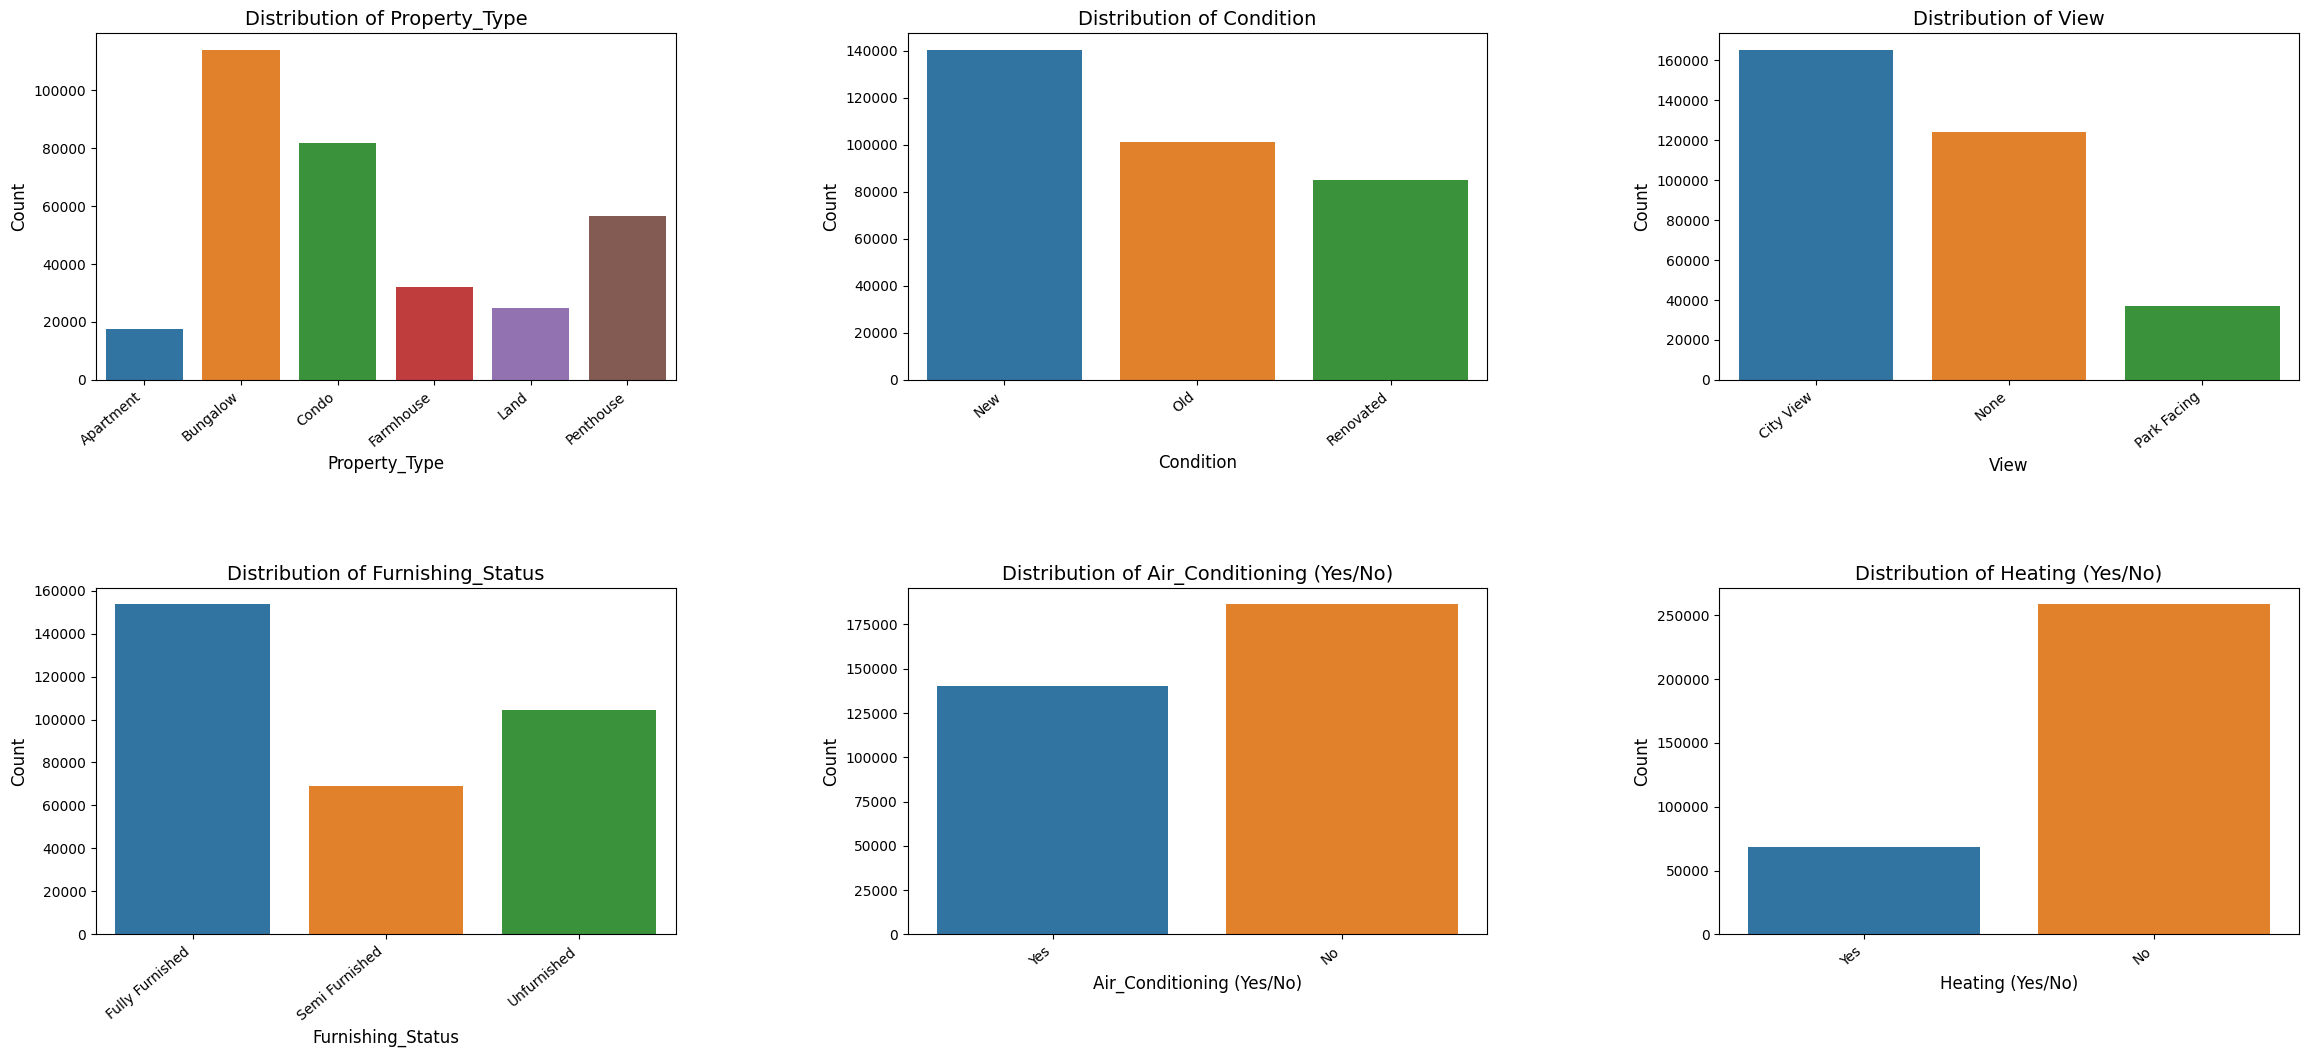

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# x-axis labels 
category_labels = {
    'Property_Type': ['Apartment', 'Bungalow', 'Condo', 'Farmhouse', 'Land', 'Penthouse'],
    'Condition': ['New', 'Old', 'Renovated'],
    'View': ['City View', 'None', 'Park Facing'],
    'Furnishing_Status': ['Fully Furnished', 'Semi Furnished', 'Unfurnished'],
    'Air_Conditioning (Yes/No)': ['Yes', 'No'],
    'Heating (Yes/No)': ['Yes', 'No']
}

# Subset of variables 
categorical_cols = list(category_labels.keys())

# No of rows and columns 
n_rows = 2
n_cols = 3

# subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 14)) 
axes = axes.flatten()

# Plot each categorical variable
for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, ax=axes[i], hue=col, dodge=False)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_xticks(range(len(category_labels[col])))  # Set the correct number of ticks
    axes[i].set_xticklabels(category_labels[col], rotation=40, fontsize=10, ha="right")  # Rotate labels more significantly
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].legend([], [], frameon=False)  

# Remove empty subplots 
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=4.0)  
plt.subplots_adjust(bottom=0.3, wspace=0.4, hspace=0.6)  

# plot
plt.show()


In [15]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Dictionary to hold the encoding information
encoding_info = {}

# label encoding each categorical column and store encoding information
for col in categorical_columns:
    # Remove spaces
    data[col] = data[col].str.strip()
    
    # label encoding
    data[col] = le.fit_transform(data[col])
    
    # Store encoding information
    encoding_info[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# encoded DataFrame and the encoding information
print(data.head())
print("\nEncoding Information:\n")
for col, encoding in encoding_info.items():
    print(f"{col}: {encoding}")

C:\Users\Vrinda\AppData\Local\Temp\ipykernel_16536\656559642.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].str.strip()
C:\Users\Vrinda\AppData\Local\Temp\ipykernel_16536\656559642.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\Vrinda\AppData\Local\Temp\ipykernel_16536\656559642.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

   No  Property_Type  Land_Area  Floor_Area  Condition  View  \
1   2              3     1768.0      1530.0          0     0   
2   3              0     2667.0      2667.0          1     1   
3   4              0     1262.0      1262.0          1     0   
4   5              0     1720.0      1720.0          2     0   
5   6              2     1602.0      1180.0          1     2   

   Furnishing_Status  Air_Conditioning (Yes/No)  Heating (Yes/No)  \
1                  1                          0                 1   
2                  0                          1                 0   
3                  1                          1                 0   
4                  1                          1                 0   
5                  0                          1                 0   

   Kitchen_Type  ...  distance to nearest Airport  Crimerate in area     \
1             1  ...                        21.99                7.7  0   
2             1  ...                        11.06 

C:\Users\Vrinda\AppData\Local\Temp\ipykernel_16536\656559642.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\Vrinda\AppData\Local\Temp\ipykernel_16536\656559642.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].str.strip()
C:\Users\Vrinda\AppData\Local\Temp\ipykernel_16536\656559642.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

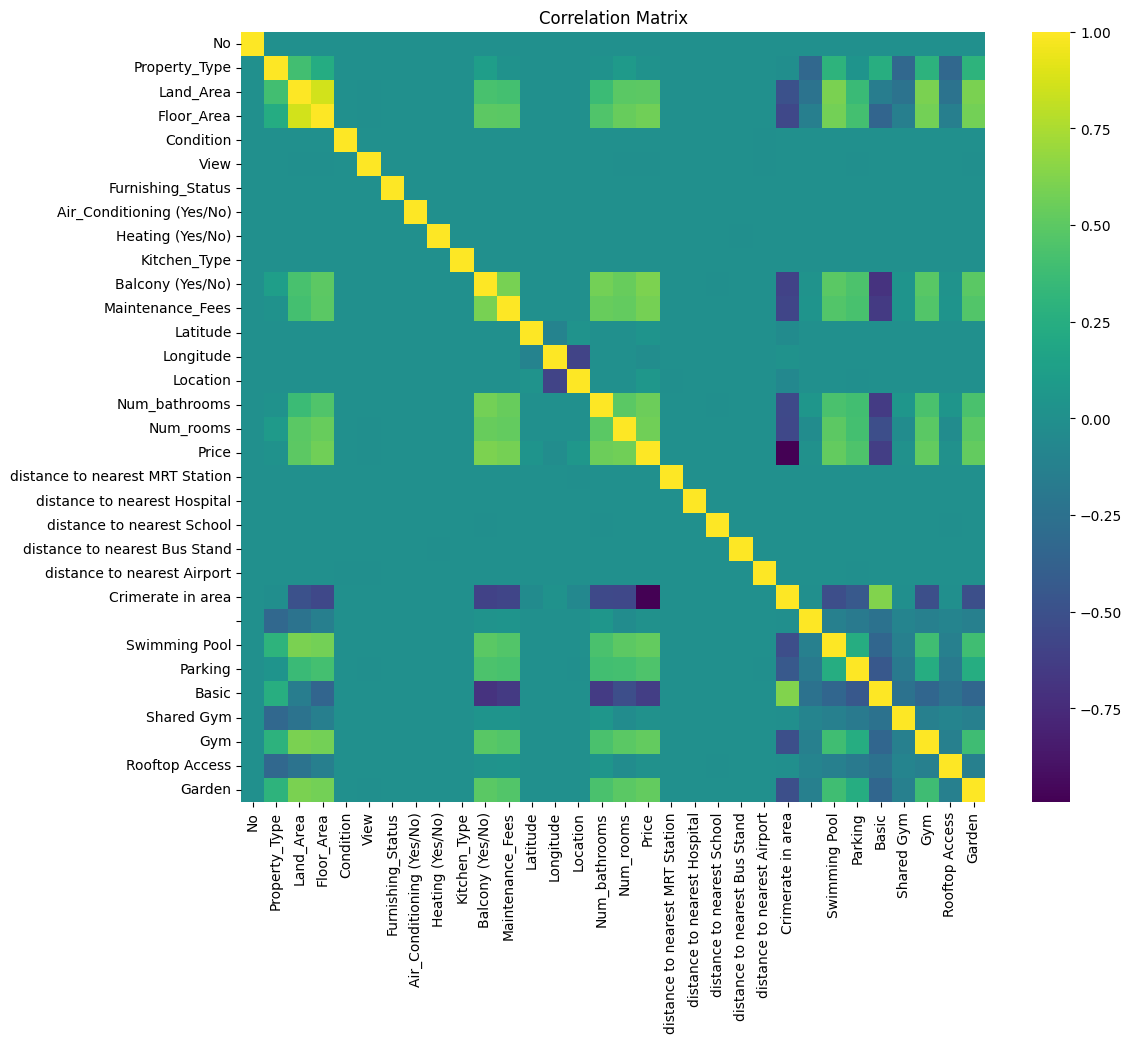

In [16]:
# correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()


In [17]:
data.columns

Index(['No', 'Property_Type', 'Land_Area', 'Floor_Area', 'Condition', 'View',
       'Furnishing_Status', 'Air_Conditioning (Yes/No)', 'Heating (Yes/No)',
       'Kitchen_Type', 'Balcony (Yes/No)', 'Maintenance_Fees', 'Latitude',
       'Longitude', 'Location', 'Num_bathrooms', 'Num_rooms', 'Price',
       'distance to nearest MRT Station', 'distance to nearest Hospital',
       'distance to nearest School', 'distance to nearest Bus Stand',
       'distance to nearest Airport', 'Crimerate in area', '', 'Swimming Pool',
       'Parking', 'Basic', 'Shared Gym', 'Gym', 'Rooftop Access', 'Garden'],
      dtype='object')

In [18]:
#Dropping Unnecesaary Variables
data.drop(['No','Latitude','Longitude'],axis=1,inplace=True)

C:\Users\Vrinda\AppData\Local\Temp\ipykernel_16536\3249402415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['No','Latitude','Longitude'],axis=1,inplace=True)


In [19]:
# Define features (X) and target variable (y)
X = data.drop(['Price'], axis=1)  
y = data['Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
data.columns

Index(['Property_Type', 'Land_Area', 'Floor_Area', 'Condition', 'View',
       'Furnishing_Status', 'Air_Conditioning (Yes/No)', 'Heating (Yes/No)',
       'Kitchen_Type', 'Balcony (Yes/No)', 'Maintenance_Fees', 'Location',
       'Num_bathrooms', 'Num_rooms', 'Price',
       'distance to nearest MRT Station', 'distance to nearest Hospital',
       'distance to nearest School', 'distance to nearest Bus Stand',
       'distance to nearest Airport', 'Crimerate in area', '', 'Swimming Pool',
       'Parking', 'Basic', 'Shared Gym', 'Gym', 'Rooftop Access', 'Garden'],
      dtype='object')

In [21]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predictions
y_pred_lr = linear_model.predict(X_test)

In [23]:
# Metrics for Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("Linear Regression Metrics:")
print(f"R²: {r2_lr}, MAPE: {mape_lr}, MSE: {mse_lr}, RMSE: {rmse_lr}")

Linear Regression Metrics:
R²: 0.983234543878013, MAPE: 0.18130383805452774, MSE: 75846308898.11491, RMSE: 275402.0858637692


In [24]:
import statsmodels.api as sm

# constant to the independent variables for OLS
X_train_const = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_const).fit()

# Print summary
print(ols_model.summary())

# Predict on the test set using the OLS model
X_test_const = sm.add_constant(X_test)
y_pred_ols = ols_model.predict(X_test_const)

# Metrics for OLS Linear Regression
r2_ols = r2_score(y_test, y_pred_ols)
mape_ols = mean_absolute_percentage_error(y_test, y_pred_ols)
mse_ols = mean_squared_error(y_test, y_pred_ols)
rmse_ols = np.sqrt(mse_ols)

print("\nOLS Linear Regression Metrics:")
print(f"R²: {r2_ols}, MAPE: {mape_ols}, MSE: {mse_ols}, RMSE: {rmse_ols}")


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 5.515e+05
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:38:18   Log-Likelihood:            -3.6469e+06
No. Observations:              261500   AIC:                         7.294e+06
Df Residuals:                  261471   BIC:                         7.294e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [25]:
# Correlation matrix
corr_matrix = X_train.corr()

# Remove one variable from each highly correlated pair
threshold = 0.8
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns 
                   if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > threshold]

print("Highly Correlated Pairs:")
print(high_corr_pairs)

Highly Correlated Pairs:
[('Land_Area', 'Floor_Area'), ('Floor_Area', 'Land_Area')]


In [26]:
#Dropping Highly Correlated Variables as OLS model showing High Multicollinearity
data.drop(['Floor_Area', 'Land_Area'],axis=1,inplace=True)

C:\Users\Vrinda\AppData\Local\Temp\ipykernel_16536\1426167783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Floor_Area', 'Land_Area'],axis=1,inplace=True)


In [27]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [28]:
# Predictions
y_pred_dt = dt_model.predict(X_test)

In [29]:
# Metrics for Decision Tree Regressor
r2_dt = r2_score(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print("Decision Tree Regressor Metrics:")
print(f"R²: {r2_dt}, MAPE: {mape_dt}, MSE: {mse_dt}, RMSE: {rmse_dt}")

Decision Tree Regressor Metrics:
R²: 0.9727494969151781, MAPE: 0.1955468011528699, MSE: 123280276991.08519, RMSE: 351112.91202558356


In [30]:
# Model Comparison
print("Model Comparison:")
print(f"Linear Regression - R²: {r2_lr}, MAPE: {mape_lr}, RMSE: {rmse_lr}")
print(f"Decision Tree - R²: {r2_dt}, MAPE: {mape_dt}, RMSE: {rmse_dt}")

# Determine the better model
if r2_lr > r2_dt:
    print("Linear Regression is the better model.")
else:
    print("Decision Tree Regressor is the better model.")


Model Comparison:
Linear Regression - R²: 0.983234543878013, MAPE: 0.18130383805452774, RMSE: 275402.0858637692
Decision Tree - R²: 0.9727494969151781, MAPE: 0.1955468011528699, RMSE: 351112.91202558356
Linear Regression is the better model.


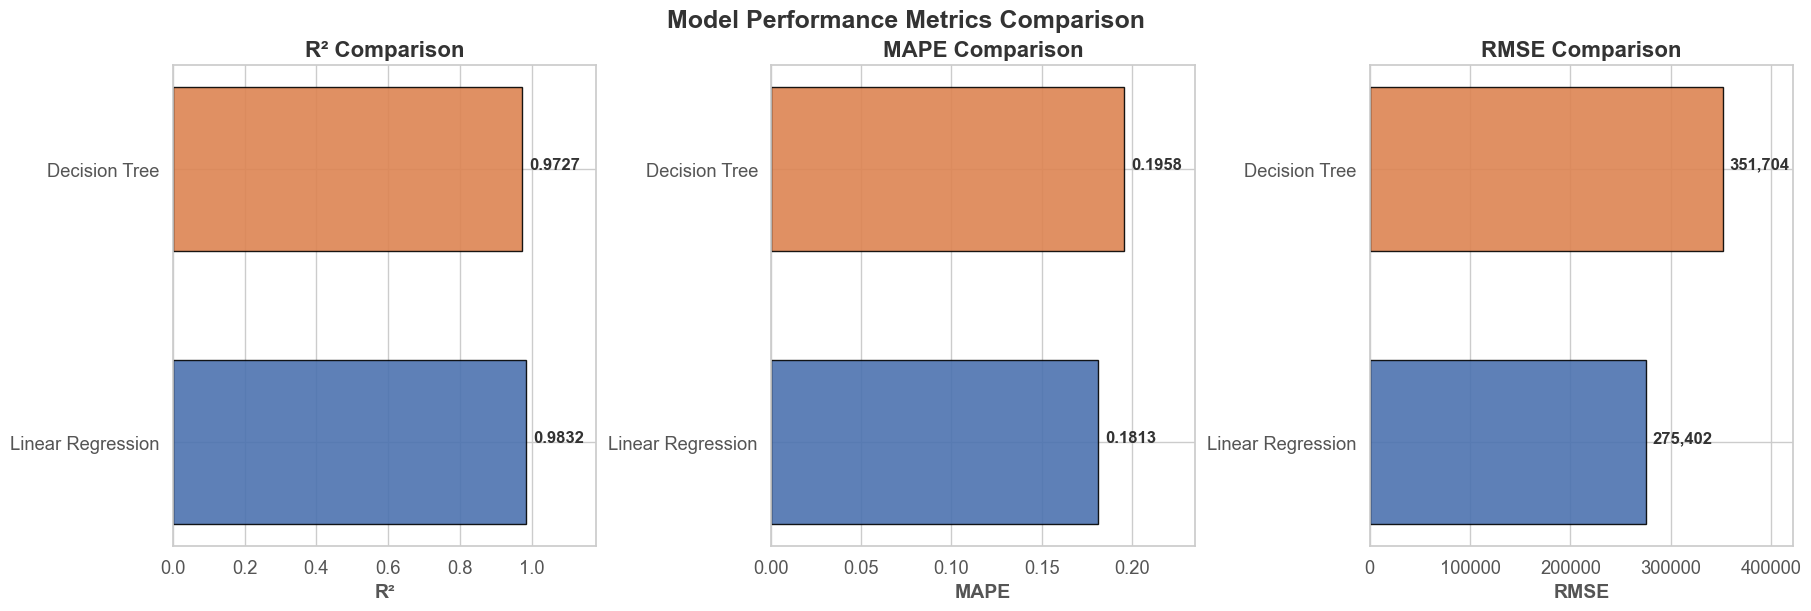

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

models = ['Linear Regression', 'Decision Tree']
metrics = ['R²', 'MAPE', 'RMSE']
metric_values = [
    [0.9832, 0.1813, 275402.09],  # Linear Regression
    [0.9727, 0.1958, 351704.81]   # Decision Tree
]

# Transpose the data 
metric_values = np.array(metric_values).T

sns.set_theme(style="whitegrid", font_scale=1.2)
plt.rcParams["font.family"] = "sans-serif"

# subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

for i, ax in enumerate(axes):

    bars = ax.barh(models, metric_values[i], color=['#4c72b0', '#dd8452'], height=0.6, alpha=0.9, edgecolor="black")
    
    ax.set_title(f'{metrics[i]} Comparison', fontsize=16, fontweight='bold', color="#333333")
    ax.set_xlabel(metrics[i], fontsize=14, fontweight='bold', color="#555555")
    ax.set_xlim(0, max(metric_values[i]) * 1.2)
    ax.tick_params(axis='x', colors="#555555")
    ax.tick_params(axis='y', colors="#555555")
    
    for bar in bars:
        width = bar.get_width()
        text = f'{width:.4f}' if width < 1 else f'{int(width):,}'
        ax.annotate(text,
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(5, 0),  
                    textcoords="offset points",
                    fontsize=12, fontweight='bold', color="#333333")

fig.suptitle("Model Performance Metrics Comparison", fontsize=18, fontweight="bold", color="#333333")
fig.patch.set_facecolor('white')

# Show plot
plt.show()


In [32]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# Predictions using Random Forest
y_pred_rf = rf_model.predict(X_test)

In [34]:
# Metrics for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Regressor Metrics:")
print(f"R²: {r2_rf}, MAPE: {mape_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}")

Random Forest Regressor Metrics:
R²: 0.9860137289554213, MAPE: 0.15056471579099093, MSE: 63273377488.88828, RMSE: 251541.99945314953


In [45]:
#  metrics 
data = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "R²": [0.9832, 0.9727, 0.9860],
    "MAPE": [0.1813, 0.1958, 0.1505],
    "RMSE": [275402.09, 351704.81, 251429.46]
}

# DataFrame
results_df = pd.DataFrame(data)

# table
try:
    from IPython.display import display
    display(results_df.style.set_table_styles(
        [{
            'selector': 'thead th',
            'props': [('background-color', '#4c72b0'), ('color', 'white'), ('font-weight', 'bold')]
        }]
    ).set_properties(**{'text-align': 'center'}))
except ImportError:
    pass

print(f"\nBest Model: {best_model[1]} with R² = {best_model[0]}")



,Model,R²,MAPE,RMSE
0,Linear Regression,0.983200,0.181300,275402.090000
1,Decision Tree,0.972700,0.195800,351704.810000
2,Random Forest,0.986000,0.150500,251429.460000



Best Model: Random Forest with R² = 0.9860137289554213


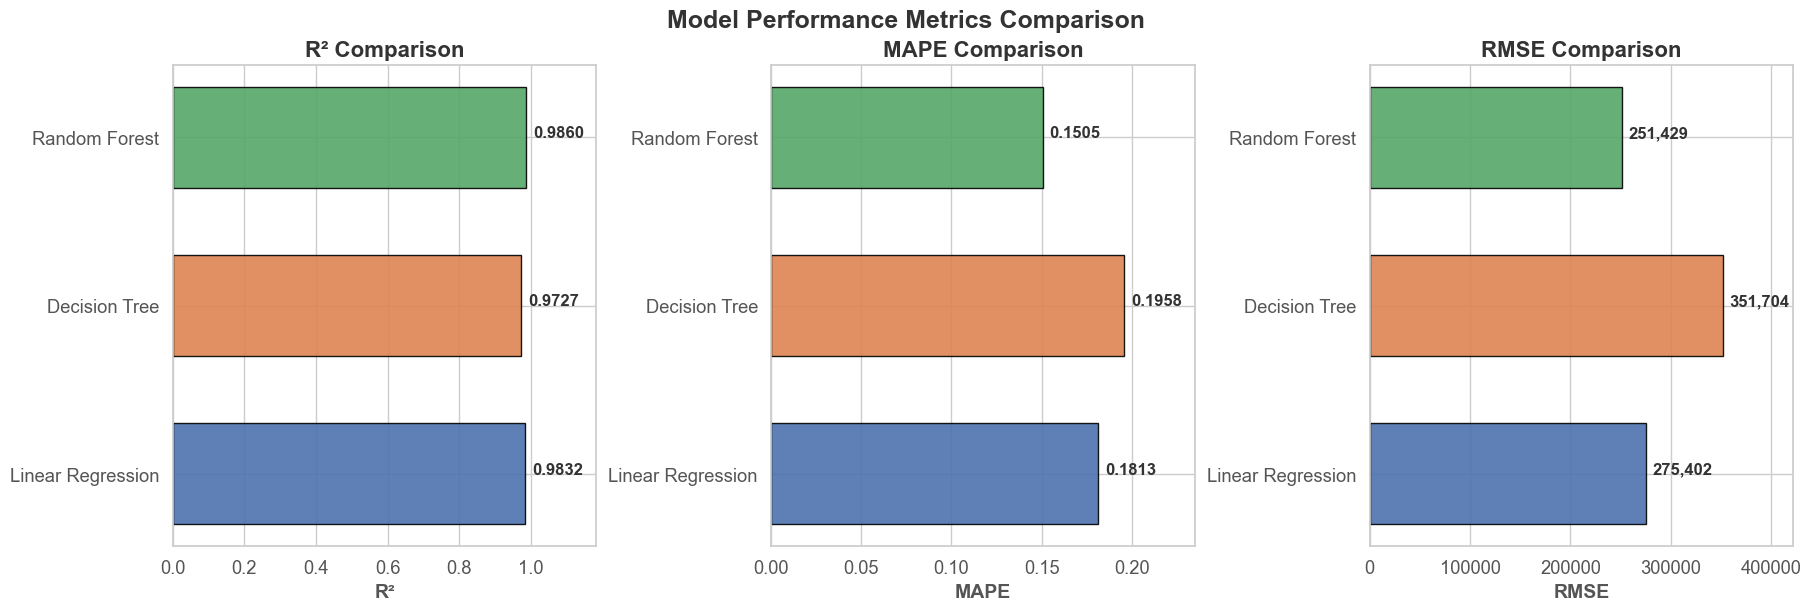

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Models and Metrics
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
metrics = ['R²', 'MAPE', 'RMSE']
metric_values = [
    [0.9832, 0.1813, 275402.09],  # Linear Regression
    [0.9727, 0.1958, 351704.81],  # Decision Tree
    [0.9860, 0.1505, 251429.46]   # Random Forest
]

# Transpose the data 
metric_values = np.array(metric_values).T

sns.set_theme(style="whitegrid", font_scale=1.2)
plt.rcParams["font.family"] = "sans-serif"

# Subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

for i, ax in enumerate(axes):

    bars = ax.barh(models, metric_values[i], color=['#4c72b0', '#dd8452', '#55a868'], height=0.6, alpha=0.9, edgecolor="black")
    
    ax.set_title(f'{metrics[i]} Comparison', fontsize=16, fontweight='bold', color="#333333")
    ax.set_xlabel(metrics[i], fontsize=14, fontweight='bold', color="#555555")
    ax.set_xlim(0, max(metric_values[i]) * 1.2)
    ax.tick_params(axis='x', colors="#555555")
    ax.tick_params(axis='y', colors="#555555")
    
    for bar in bars:
        width = bar.get_width()
        text = f'{width:.4f}' if width < 1 else f'{int(width):,}'
        ax.annotate(text,
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(5, 0),  
                    textcoords="offset points",
                    fontsize=12, fontweight='bold', color="#333333")

fig.suptitle("Model Performance Metrics Comparison", fontsize=18, fontweight="bold", color="#333333")
fig.patch.set_facecolor('white')

# Show plot
plt.show()


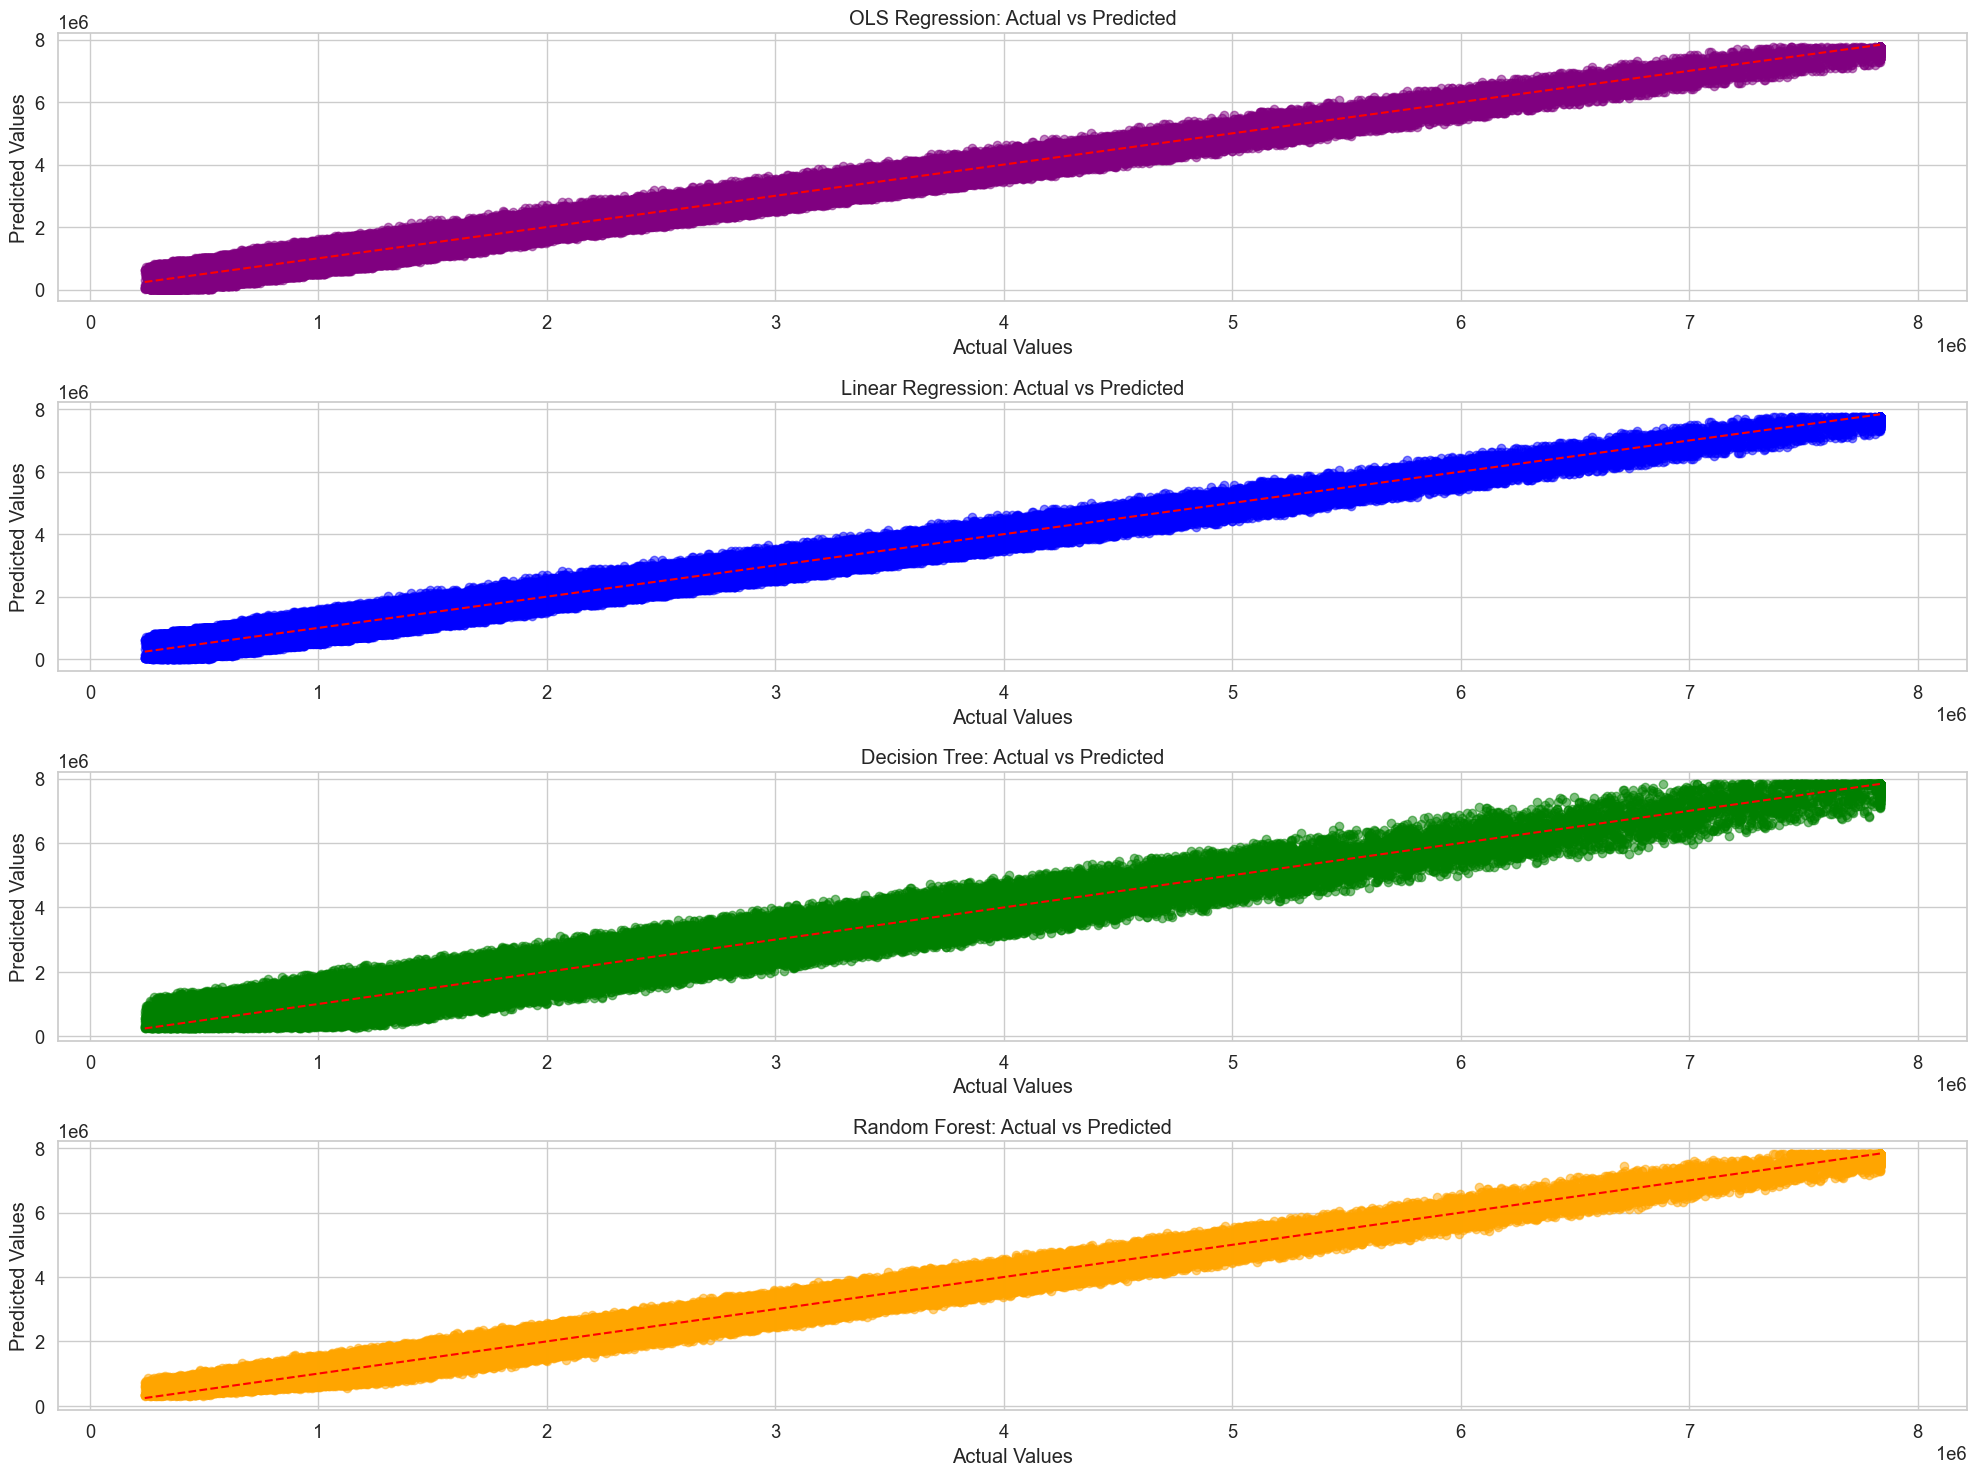

In [43]:
# Plot actual vs predicted values for each model
plt.figure(figsize=(20, 15))

# OLS Regression
plt.subplot(4, 1, 1)
plt.scatter(y_test, y_pred_ols, alpha=0.5, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("OLS Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Linear Regression
plt.subplot(4, 1, 2)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Decision Tree
plt.subplot(4, 1, 3)
plt.scatter(y_test, y_pred_dt, alpha=0.5, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Decision Tree: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Random Forest
plt.subplot(4, 1, 4)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Show all plots
plt.tight_layout()
plt.show()


##  Which features affect housing price.

In [ ]:
import pandas as pd

feature_names = X_train.columns

feature_importance = dt_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# top features based on importance
top_features = importance_df['Feature'].head(5).tolist()

# top features 
print("Top features affecting price:")
for i, feature in enumerate(top_features, start=1):
    print(f"{i}. {feature}")


Top features affecting price:
1. Crimerate in area
2. distance to nearest Hospital
3. distance to nearest Airport
4. distance to nearest MRT Station
5. distance to nearest School
